#### Inporting Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('fast')

#### Loading dataset

In [5]:
df = pd.read_csv('day (1).csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


#### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### - Shape: 730 x 16
##### - The columns are non-null hence no need for treating missing values.

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### 1 column is non-numeric (dteday is datetype)
##### Description on columns and their treatment
- 'Season' seems to be a categorical column with no order so will be renamed to its season.
- 'weathersit' categorical column numbers having order (0 is most likely to rent the bike and 4 is most unlikely)
- 'month' again categorical with the numbers having order
- 'yr', 'holiday', 'workingday' binary varibale with 0 and 1 values

In [9]:
# renaming seasons with string values
df['season'] = df['season'].replace(1,'spring')
df['season'] = df['season'].replace(2,'summer')
df['season'] = df['season'].replace(3,'fall')
df['season'] = df['season'].replace(4,'winter')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

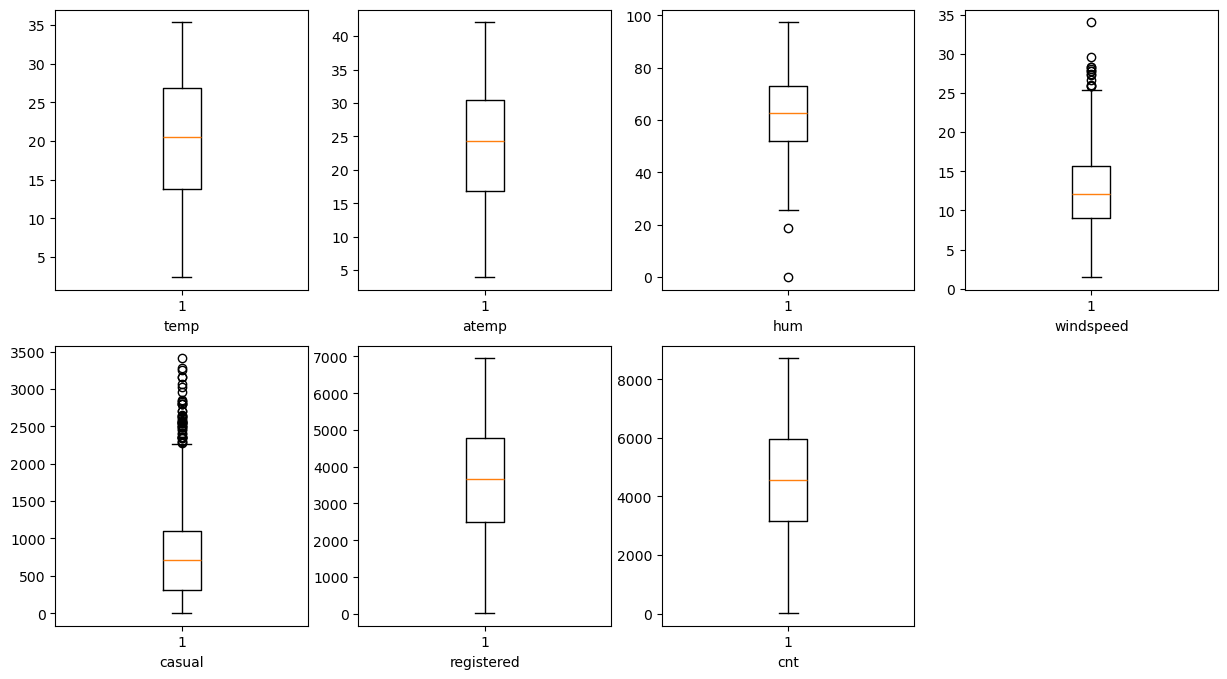

In [11]:
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(15,8))
for i in range(len(num_var)):
    plt.subplot(2,4,i+1)
    plt.boxplot(data = df, x=num_var[i])
    plt.xlabel(num_var[i])
plt.show()

In [12]:
df[df['casual']>df['casual'].quantile(0.95)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,04-07-2018,fall,0,7,1,3,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,197,16-07-2018,fall,0,7,0,1,1,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,247,04-09-2018,fall,0,9,0,2,1,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,282,09-10-2018,winter,0,10,0,2,1,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,441,17-03-2019,spring,1,3,0,0,0,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
446,447,23-03-2019,summer,1,3,0,6,0,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
461,462,07-04-2019,summer,1,4,0,0,0,1,17.937500,21.30645,25.4167,18.416357,3252,3605,6857
468,469,14-04-2019,summer,1,4,0,0,0,1,20.295000,24.39980,50.2917,12.791439,2795,4665,7460
469,470,15-04-2019,summer,1,4,0,1,1,1,24.873347,28.69375,50.7917,15.083643,2846,4286,7132
475,476,21-04-2019,summer,1,4,0,0,0,1,23.370000,27.14605,68.2917,19.000329,2541,4083,6624


In [13]:
df[df['hum']<20]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,19-02-2018,spring,0,2,0,1,1,1,16.365847,19.5702,18.7917,34.000021,532,1103,1635
68,69,10-03-2018,spring,0,3,0,6,0,3,15.952731,19.2834,0.0000,17.545759,46,577,623


In [14]:
df[df['windspeed']>25]['windspeed'].count()*100/730

2.328767123287671

In [15]:
df[df['casual']>2200]['casual'].count()*100/730

7.397260273972603

In [16]:
# Not treating the outliers in columns 'hum', 'windspeed' and 'casual' as these are daily records and the outliers are very small in numbers.

In [17]:
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [18]:
print("Original dataframe shape: ",df.shape)
print("Copy dataframe shape: ",df_dup.shape)

Original dataframe shape:  (730, 16)
Copy dataframe shape:  (730, 16)


In [19]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [20]:
# There are no duplicates in the dataframe and hence dropping 'instant', 'dteday' as these are not required.
df = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
df.shape

(730, 14)

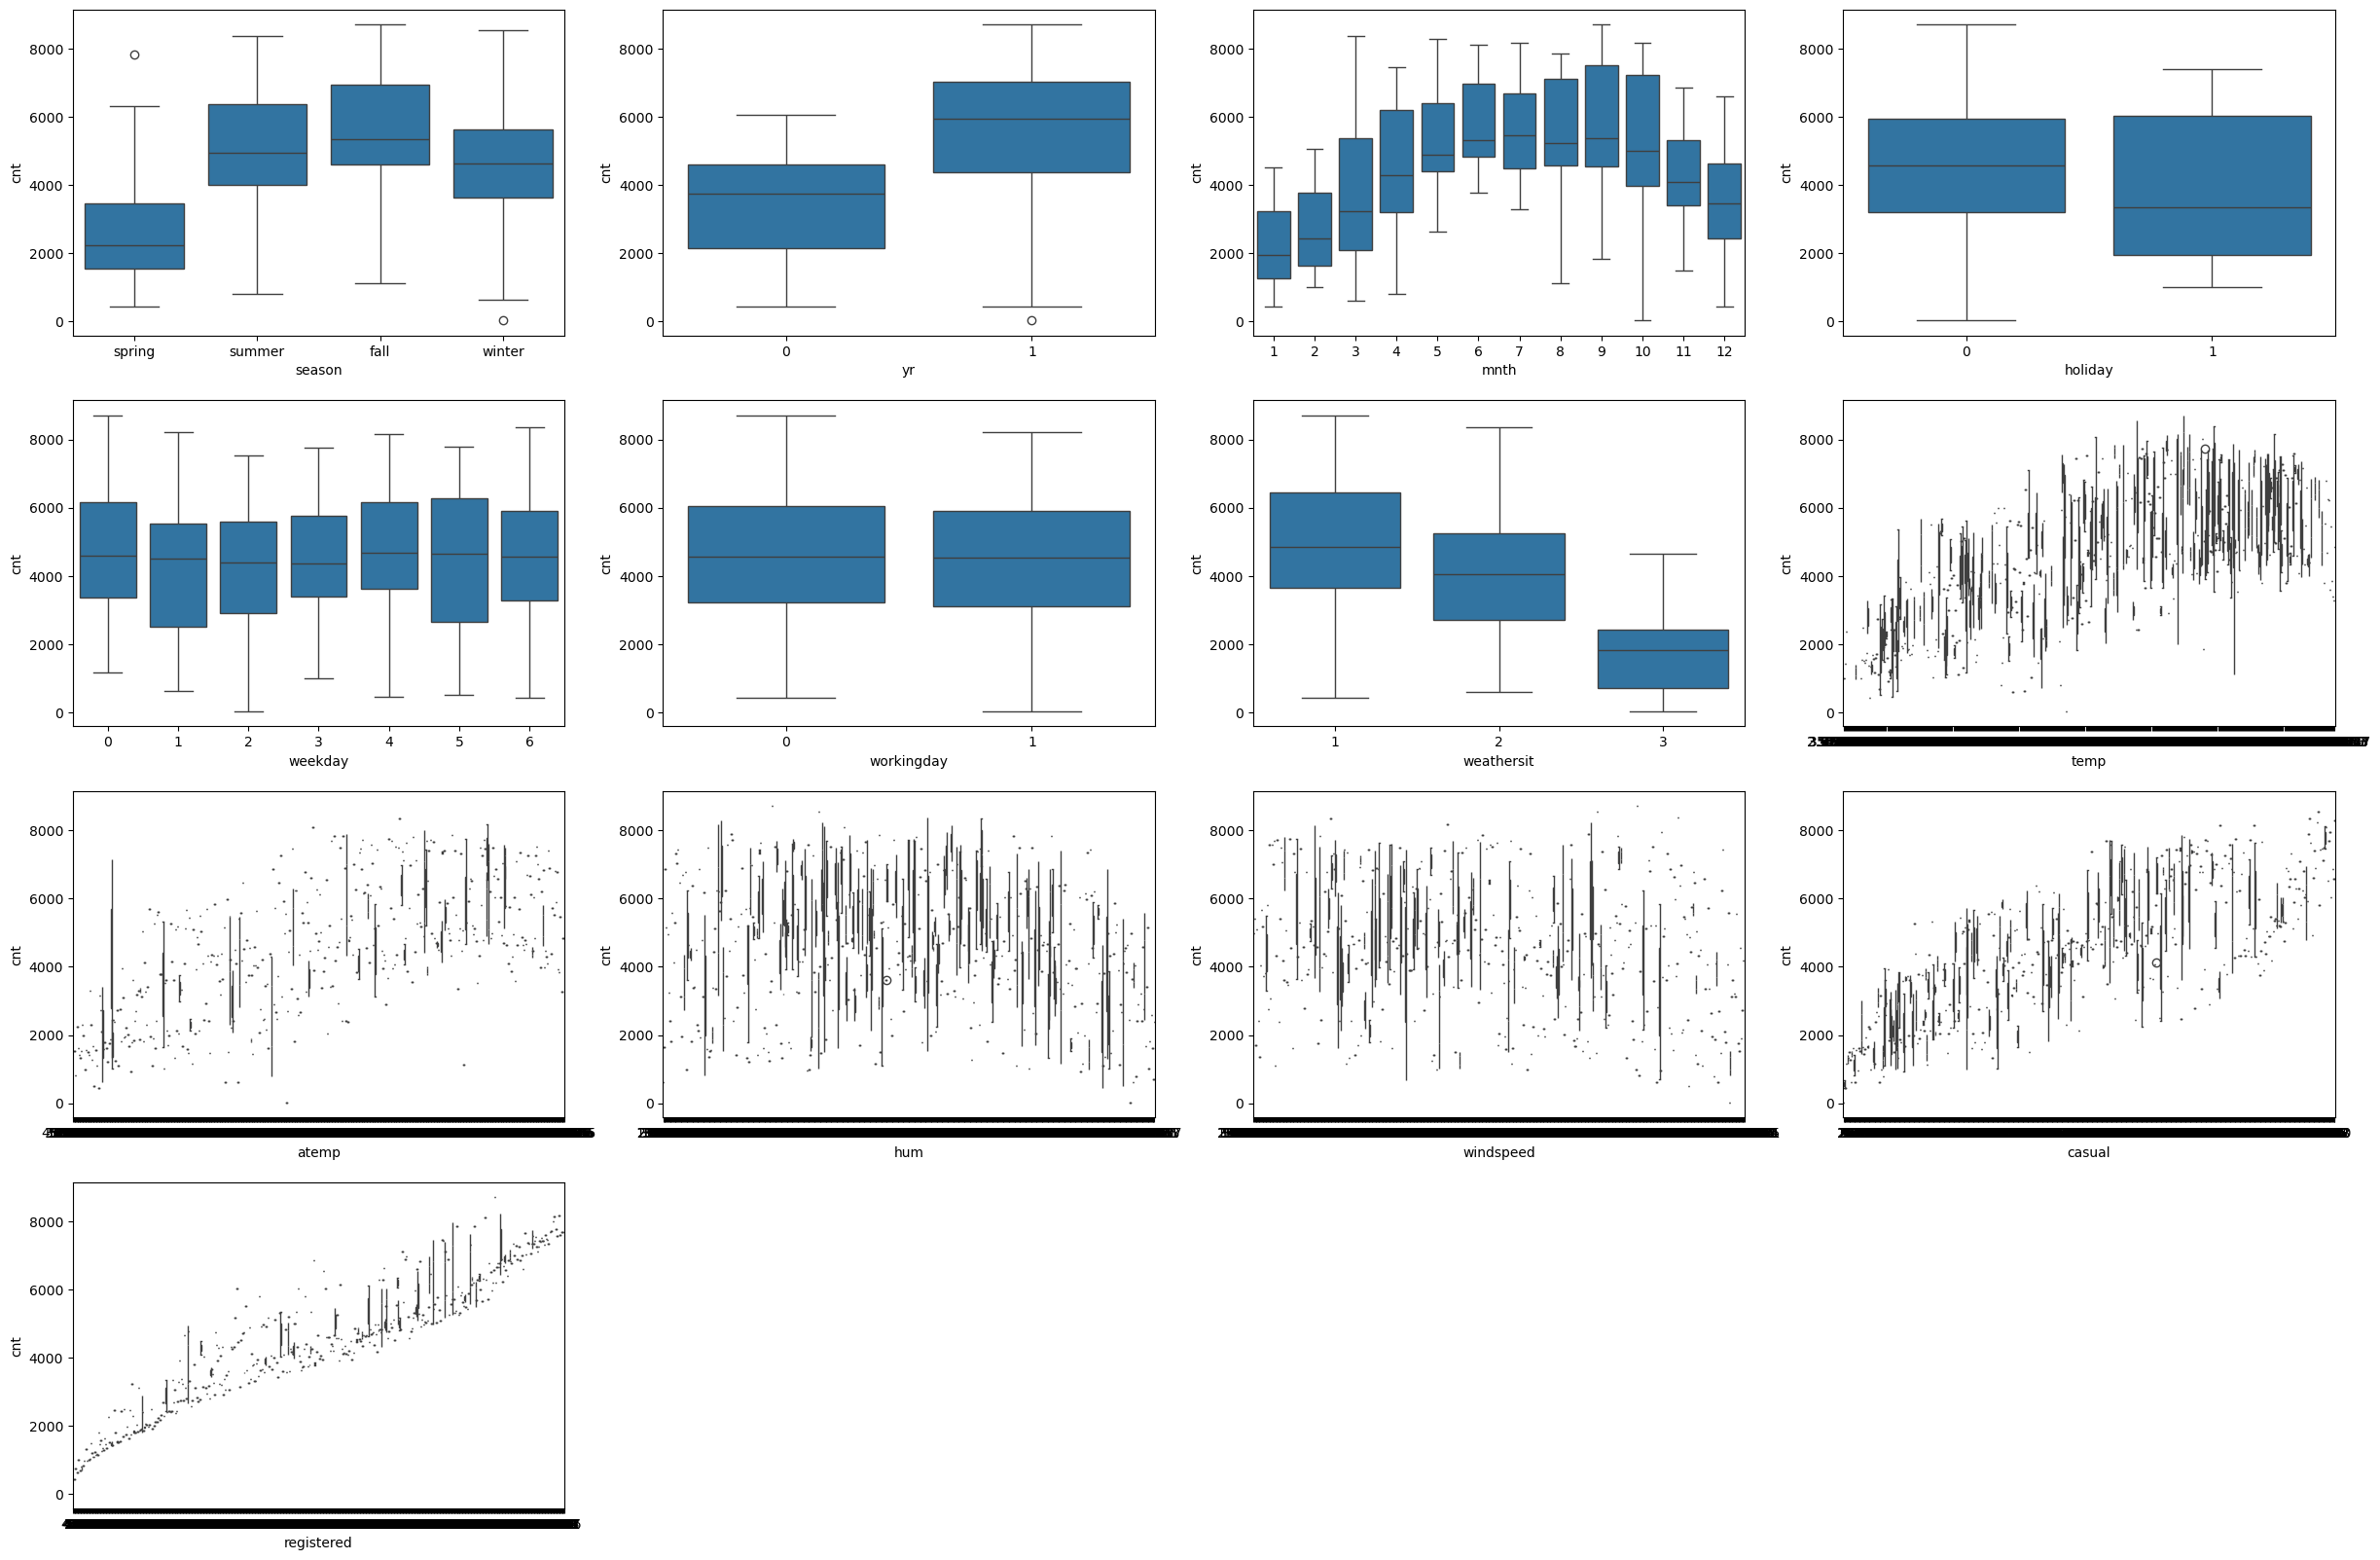

In [21]:
# plots between cnt and other variables
plt.figure(figsize=(30, 20))
x = list(df.columns)
x.remove('cnt')

for i in range(len(x)):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = x[i], y = 'cnt', data = df)
plt.show()

##### Observation
1. Season: About 32% of bike bookings happened during season 3, with a median of over 5000 bookings during those two years. Season 2 and season 4 followed, accounting for 27% and 25% of bookings, respectively. This suggests that the season is a pretty solid predictor for bike bookings.
2. Month (mnth): Months 5 through 9 had around 10% of the bookings each, with a median of over 4000 bookings per month. This shows that the month does seem to affect bookings and could be a good predictor for the target variable.
3. Weather Situation (weathersit): Around 67% of bookings occurred in ‘weathersit1’, with a median close to 5000 bookings. ‘Weathersit2’ was next with 30% of the total bookings. This means weather conditions do influence bookings and could be a useful predictor.
4. Holiday: Almost 98% of bookings were on non-holidays, which means the data is pretty skewed. Because of this, the holiday variable probably isn’t a great predictor for bookings.
5. Weekday: The bookings are pretty evenly spread throughout the week, with each day contributing between 13.5% and 14.8% of the total bookings, and medians ranging from 4000 to 5000 bookings. This suggests weekdays might have some influence, but it's not clear-cut. The model will help figure out if this variable should be included.
6. Working Day: About 69% of the bookings were on working days, with a median close to 5000 bookings. This indicates that whether it’s a working day or not could be a significant predictor for bike bookings.

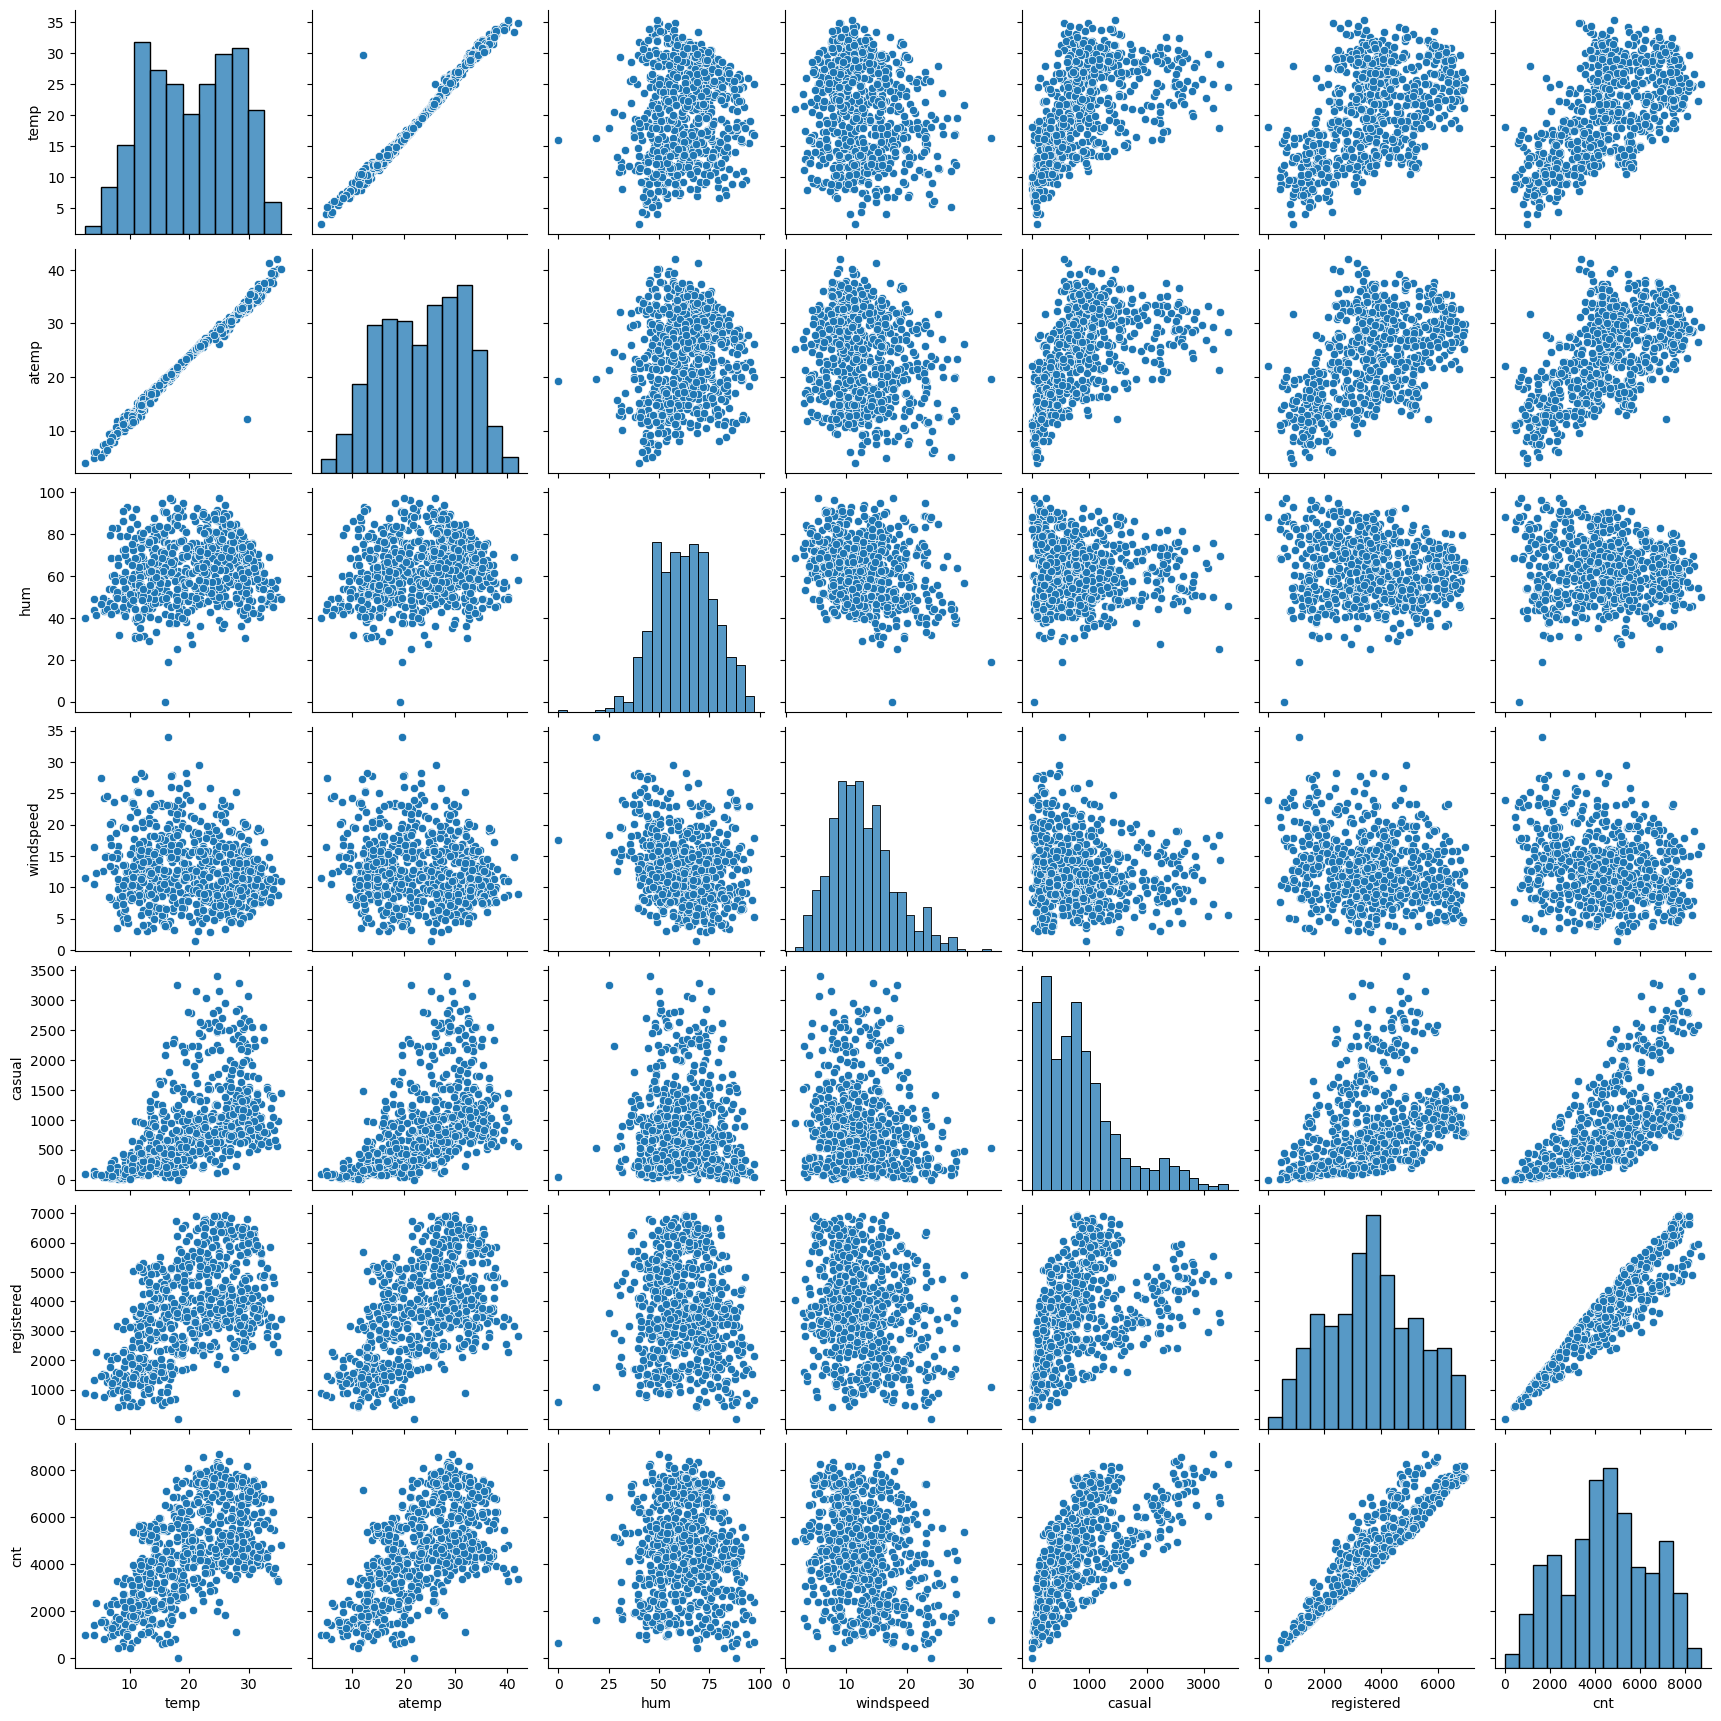

In [22]:
sns.pairplot(df[num_var])
plt.show()

#### Observation
'cnt' seems to have a linear relationship with temp, atemp, casual, registered.

#### Creating dummy variables

In [23]:
# for season
dum=pd.get_dummies(df["season"],drop_first=True,dtype=int)
dum.shape

(730, 3)

In [24]:
bike_df = pd.concat([df, dum], axis=1)
bike_df = bike_df.drop(["season"], axis=1)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [25]:
# for mnth
dum=pd.get_dummies(df["mnth"],drop_first=True,dtype=int)
dum.shape
bike_df = pd.concat([bike_df, dum], axis=1)
bike_df = bike_df.drop(["mnth"], axis=1)
bike_df.shape

(730, 26)

In [26]:
bike_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

In [28]:
print(bike_df.info())
bike_df = pd.get_dummies(bike_df, drop_first=True)
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    int64   
 1   holiday     730 non-null    int64   
 2   weekday     730 non-null    category
 3   workingday  730 non-null    int64   
 4   weathersit  730 non-null    category
 5   temp        730 non-null    float64 
 6   atemp       730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   casual      730 non-null    int64   
 10  registered  730 non-null    int64   
 11  cnt         730 non-null    int64   
 12  spring      730 non-null    int32   
 13  summer      730 non-null    int32   
 14  winter      730 non-null    int32   
 15  2           730 non-null    int32   
 16  3           730 non-null    int32   
 17  4           730 non-null    int32   
 18  5           730 non-null    int32   
 19  6       

In [29]:
bike_df.columns=bike_df.columns.astype(str)

In [30]:
# dropping 'casual', 'registered' and creating a ratio column for both
bike_df['ratio'] = bike_df['casual']/bike_df['registered']
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,ratio
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,True,False,False,False,False,False,True,False,0.506116
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,False,True,False,False,False,False,True,False,0.195522
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,False,False,True,False,False,False,False,False,0.097640
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,False,False,False,True,False,False,False,False,0.074278
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,False,False,False,False,True,False,False,False,0.054018


In [31]:
bike_df.drop(['casual','registered'], axis=1, inplace=True)
bike_df.shape

(730, 31)

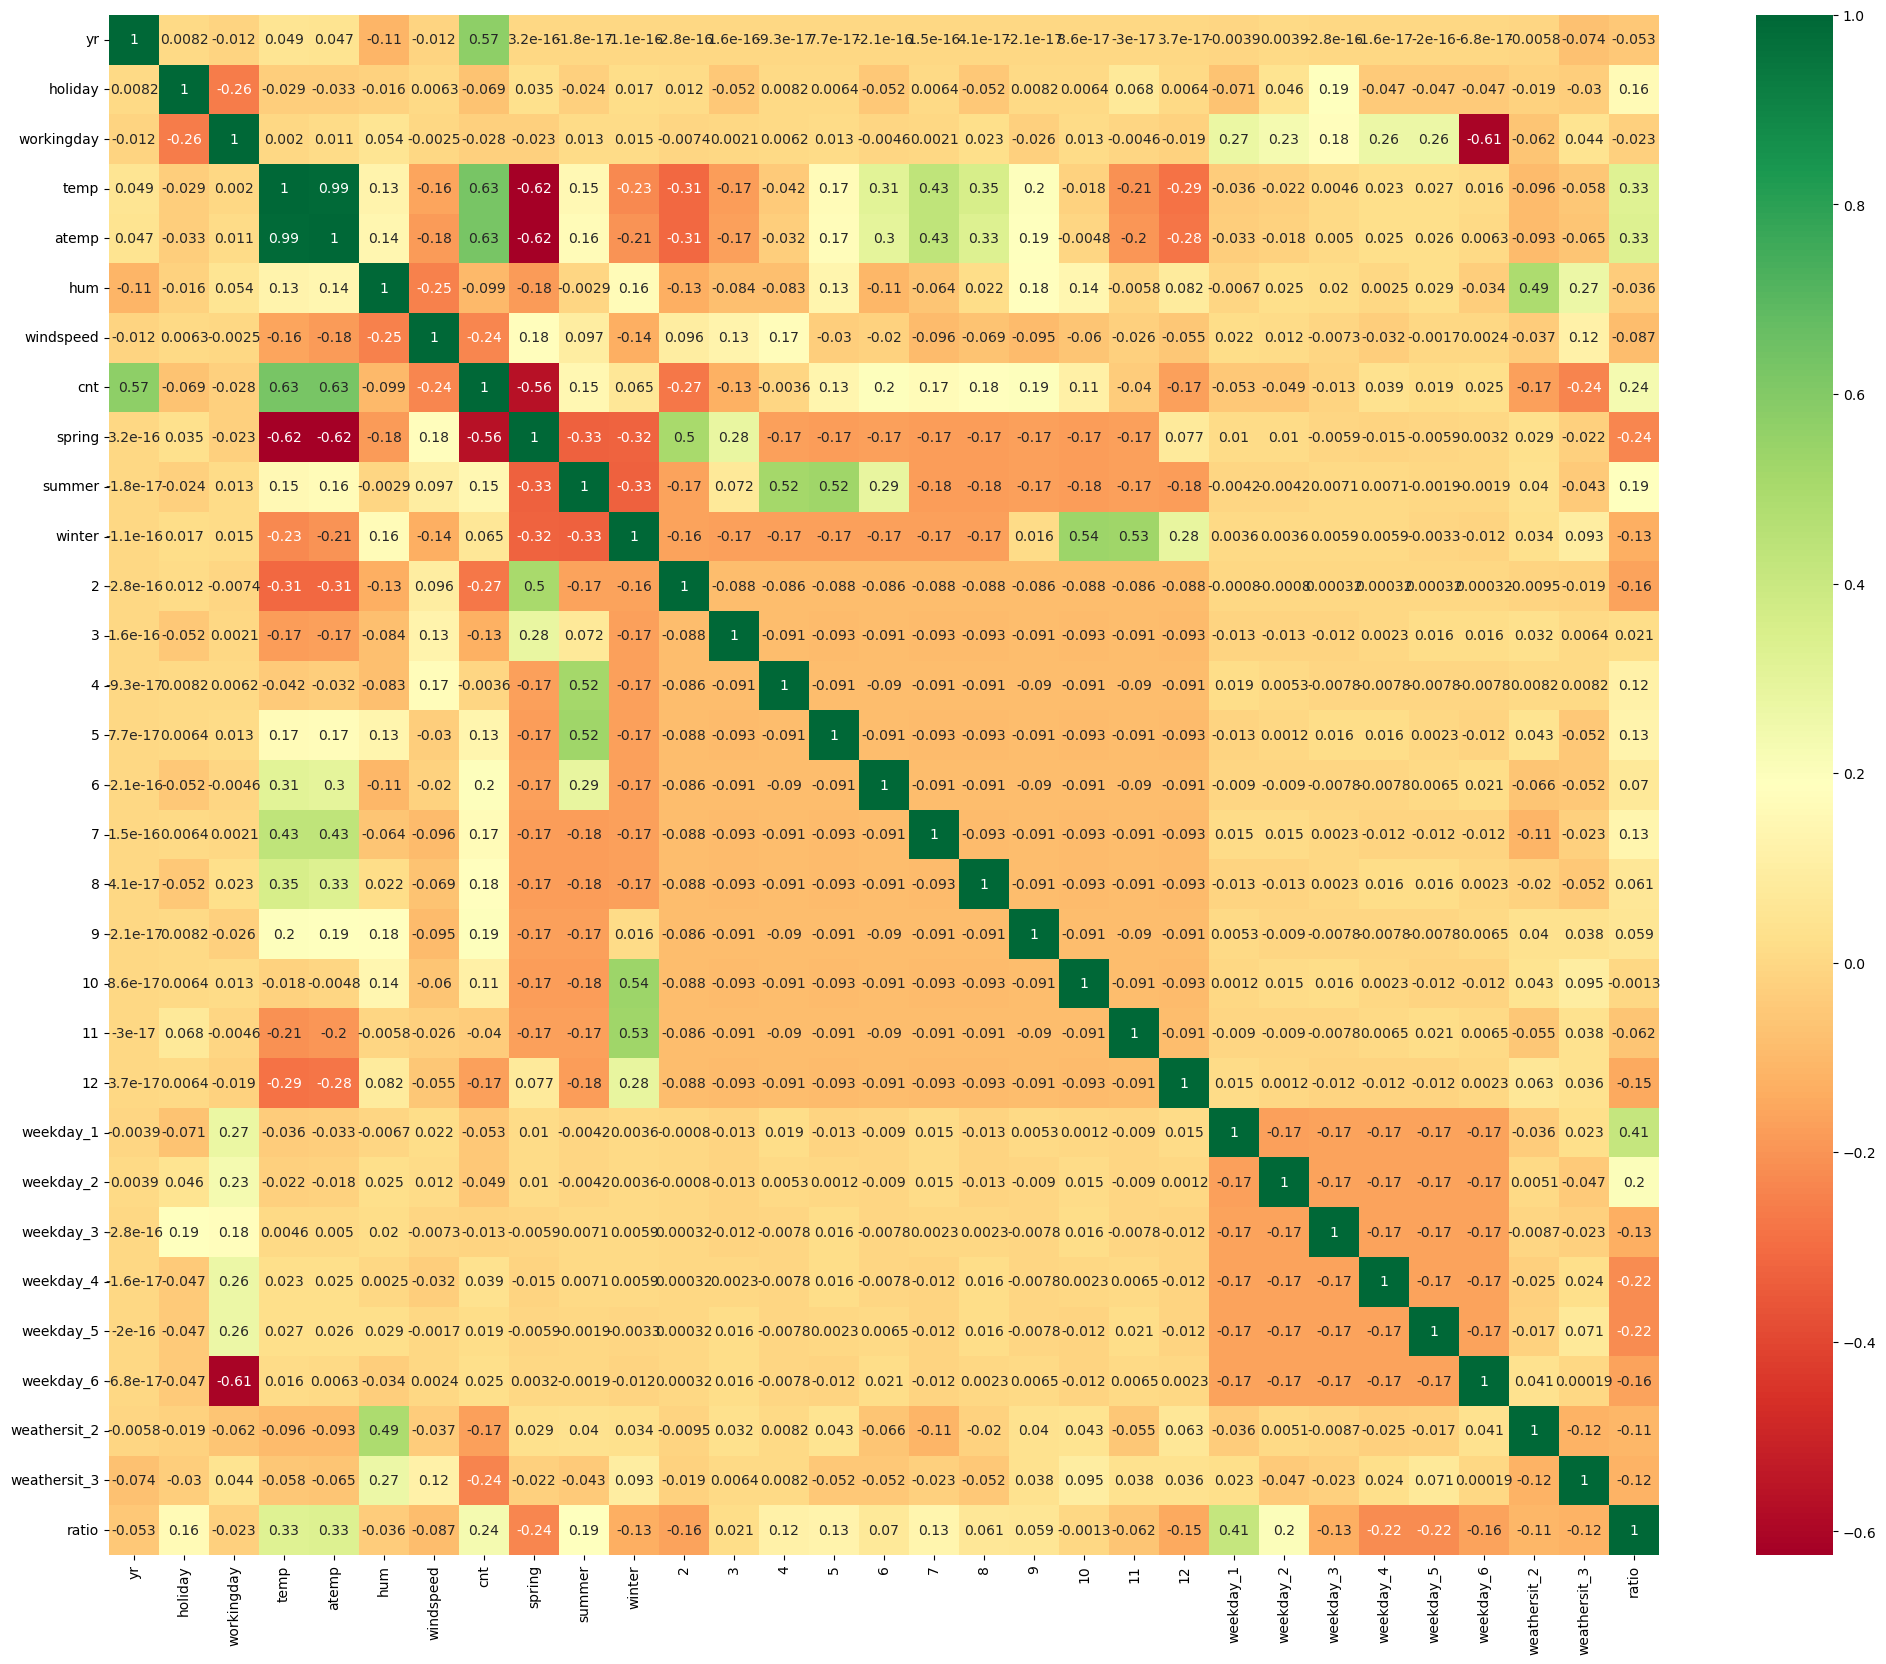

In [32]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Observation
- spring is negatively correlated with cnt
- cnt is positively correlated with temp and year
- temp and atemp are highly correlated so one of these should be in the model
- weekday and workday are also highly correlated and one of them should be in the model if present that is.
- correlation is seen between different months
- weathersit_2 and hum are also correlated positively.

#### Train test split

In [33]:
X= bike_df.drop(["cnt"], axis=1)
y= bike_df["cnt"]

In [34]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 
print(X_train.shape) 
print(X_test.shape)

(584, 30)
(146, 30)


#### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [36]:
X_train_df = pd.DataFrame(X_train,columns=X.columns) 
X_test_df = pd.DataFrame(X_test,columns=X.columns) 
X_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,ratio
0,0.972968,-0.167836,0.614295,-1.884077,-2.133573,-1.351866,2.236778,1.724178,-0.572078,-0.577350,...,-0.309330,-0.429633,-0.435212,-0.39841,2.422930,-0.424026,-0.369035,-0.721688,-0.167836,-1.034046
1,0.972968,-0.167836,0.614295,-0.306750,-0.241154,-1.193941,-0.119144,-0.579987,-0.572078,1.732051,...,-0.309330,-0.429633,-0.435212,-0.39841,-0.412723,2.358346,-0.369035,-0.721688,-0.167836,-0.603154
2,-1.027783,-0.167836,0.614295,-0.417439,-0.444845,-1.819690,2.905344,1.724178,-0.572078,-0.577350,...,-0.309330,-0.429633,-0.435212,2.50998,-0.412723,-0.424026,-0.369035,-0.721688,-0.167836,-0.612667
3,0.972968,-0.167836,-1.627882,-0.938605,-0.918998,0.957450,-0.771827,-0.579987,-0.572078,1.732051,...,3.232798,-0.429633,-0.435212,-0.39841,-0.412723,-0.424026,2.709771,1.385641,-0.167836,-0.859011
4,0.972968,-0.167836,0.614295,-1.791834,-1.914161,-1.509791,0.772439,1.724178,-0.572078,-0.577350,...,-0.309330,-0.429633,2.297731,-0.39841,-0.412723,-0.424026,-0.369035,-0.721688,-0.167836,-0.517895


#### Feature selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
estimator = LinearRegression()

#### Model-1

In [39]:
selector = RFE(estimator, n_features_to_select =5)

In [40]:
selector = selector.fit(X_train_df, y_train)
selector.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [41]:
selected_features = X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'temp', 'hum', 'windspeed', 'winter'], dtype='object')


In [42]:
X_train = X_train_df[selected_features] 
X_test = X_test_df[selected_features]

##### Modelling

In [43]:
import statsmodels.api as sm 
X_train_sm = sm.add_constant(X_train)

In [44]:
#X_train_sm["const"]=1 
X_test_sm = sm.add_constant(X_test) 
model1 = sm.OLS(np.array(y_train),X_train_sm) 
res1 = model1.fit() 
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     400.1
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          5.31e-185
Time:                        14:10:00   Log-Likelihood:                -4818.2
No. Observations:                 584   AIC:                             9648.
Df Residuals:                     578   BIC:                             9675.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     38.539    116.900      0.000    4429.573    4580.962
yr           970.2266     38.894     24.945      0.000     893.835    1046.618
temp        1289.7870     40.954     31.493      0.000    1209.349    1370.225
hum         -376.0304     41.152     -9.138      0.000    -456.856    -295.205
windspeed   -319.2560     40.706     -7.843      0.000    -399.206    -239.306
winter       443.8058     40.550     10.945      0.000     364.163     523.448
==============================================================================
Omnibus:                       81.361   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.914
Skew:                          -0.788   Prob(JB):                     3.45e-37
Kurtosis:                       5.101   Cond. No.                         1.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X1 = X_train_new
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,1.14
1,temp,1.13
3,windspeed,1.12
4,winter,1.11
0,yr,1.02


##### Although the model has a decent r square value and adjust r value and Since it is just one model so comparing it with a second model with more parameters.

#### Model-2

In [96]:
selector = RFE(estimator, n_features_to_select =10)
selector = selector.fit(X_train_df, y_train)
selector.support_
selected_features = X_train_df.columns[selector.support_]
print(selected_features)
X_train = X_train_df[selected_features] 
X_test = X_test_df[selected_features]

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '9',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [97]:
X_train_sm = sm.add_constant(X_train)
#X_train_sm["const"]=1 
X_test_sm = sm.add_constant(X_test) 
model2 = sm.OLS(np.array(y_train),X_train_sm) 
res2 = model2.fit() 
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          9.93e-218
Time:                        15:13:20   Log-Likelihood:                -4726.5
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     573   BIC:                             9523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671     33.079    136.196      0.000    4440.296    4570.239
yr             980.5301     33.584     29.197      0.000     914.568    1046.492
temp          1036.0746     61.561     16.830      0.000     915.162    1156.987
hum           -203.2281     45.834     -4.434      0.000    -293.251    -113.205
windspeed     -259.7140     36.085     -7.197      0.000    -330.588    -188.840
spring        -187.1192     73.252     -2.554      0.011    -330.994     -43.244
summer         269.0657     49.359      5.451      0.000     172.119     366.012
winter         432.3926     58.771      7.357      0.000     316.960     547.825
9              210.1894     35.800      5.871      0.000     139.874     280.505
weathersit_2  -205.5620     41.638     -4.937      0.000    -287.344    -123.780
weathersit_3  -341.0570     36.805     -9.267      0.000    -413.346    -268.768
==============================================================================
Omnibus:                       96.588   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.608
Skew:                          -0.850   Prob(JB):                     3.43e-53
Kurtosis:                       5.653   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X1 = X_train_new
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,4.90
1,temp,3.46
6,winter,3.16
5,summer,2.23
2,hum,1.92
8,weathersit_2,1.58
9,weathersit_3,1.24
3,windspeed,1.19
7,9,1.17
0,yr,1.03


##### On observing the p values, r square and adj. R values this model is better than Model-1. But there might be a possibility of more parameters improving the model so adding 2 more parameters to this model.

#### Model-3

In [99]:
selector = RFE(estimator, n_features_to_select =12)
selector = selector.fit(X_train_df, y_train)
selector.support_
selected_features = X_train_df.columns[selector.support_]
print(selected_features)
X_train = X_train_df[selected_features] 
X_test = X_test_df[selected_features]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '9', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [100]:
X_train_sm = sm.add_constant(X_train)
#X_train_sm["const"]=1 
X_test_sm = sm.add_constant(X_test) 
model3 = sm.OLS(np.array(y_train),X_train_sm) 
res3 = model3.fit() 
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     256.4
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          8.12e-221
Time:                        15:13:20   Log-Likelihood:                -4713.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     571   BIC:                             9510.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671     32.401    139.048      0.000    4441.628    4568.906
yr             983.7553     32.901     29.901      0.000     919.134    1048.377
holiday       -170.3513     33.930     -5.021      0.000    -236.994    -103.709
workingday     -80.0951     33.912     -2.362      0.019    -146.703     -13.487
temp          1030.9675     60.309     17.095      0.000     912.513    1149.422
hum           -196.9456     44.985     -4.378      0.000    -285.301    -108.590
windspeed     -255.7966     35.353     -7.236      0.000    -325.234    -186.359
spring        -175.3185     71.787     -2.442      0.015    -316.318     -34.319
summer         268.9433     48.384      5.559      0.000     173.912     363.975
winter         442.7852     57.609      7.686      0.000     329.633     555.937
9              214.6485     35.105      6.114      0.000     145.697     283.600
weathersit_2  -220.0650     40.975     -5.371      0.000    -300.545    -139.585
weathersit_3  -349.7085     36.093     -9.689      0.000    -420.600    -278.817
==============================================================================
Omnibus:                       90.756   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.800
Skew:                          -0.835   Prob(JB):                     2.05e-45
Kurtosis:                       5.381   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X1 = X_train_new
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,spring,4.91
3,temp,3.46
8,winter,3.16
7,summer,2.23
4,hum,1.93
10,weathersit_2,1.60
11,weathersit_3,1.24
5,windspeed,1.19
9,9,1.17
1,holiday,1.10


##### Here, the pvalues are okay and so are the other values. But the R square value has only increased minimally at the cost of 2 parameters even though the VIF is acceptable. I think Model-2 is better performing than model -3. Also, we have seen that holiday and workingday are not good predictors.

##### The Equation of the model is:
cnt = 4505.2671 + 980.5301*yr + 1036.0746*temp - 203.2281*hum - 259.7140*windspeed + - 187.1192*spring + 269.0657*summer + 432.3926*winter + 210.1894*september - 205.5620*weathersit_2 	- 341.0570*weathersit_3

In [111]:
# Running model again
selector = RFE(estimator, n_features_to_select =10)
selector = selector.fit(X_train_df, y_train)
selector.support_
selected_features = X_train_df.columns[selector.support_]
print(selected_features)
X_train = X_train_df[selected_features] 
X_test = X_test_df[selected_features]

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '9',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [112]:
X_train_sm = sm.add_constant(X_train)
#X_train_sm["const"]=1 
X_test_sm = sm.add_constant(X_test) 
model2 = sm.OLS(np.array(y_train),X_train_sm) 
res2 = model2.fit() 
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          9.93e-218
Time:                        15:19:19   Log-Likelihood:                -4726.5
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     573   BIC:                             9523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4505.2671     33.079    136.196      0.000    4440.296    4570.239
yr             980.5301     33.584     29.197      0.000     914.568    1046.492
temp          1036.0746     61.561     16.830      0.000     915.162    1156.987
hum           -203.2281     45.834     -4.434      0.000    -293.251    -113.205
windspeed     -259.7140     36.085     -7.197      0.000    -330.588    -188.840
spring        -187.1192     73.252     -2.554      0.011    -330.994     -43.244
summer         269.0657     49.359      5.451      0.000     172.119     366.012
winter         432.3926     58.771      7.357      0.000     316.960     547.825
9              210.1894     35.800      5.871      0.000     139.874     280.505
weathersit_2  -205.5620     41.638     -4.937      0.000    -287.344    -123.780
weathersit_3  -341.0570     36.805     -9.267      0.000    -413.346    -268.768
==============================================================================
Omnibus:                       96.588   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.608
Skew:                          -0.850   Prob(JB):                     3.43e-53
Kurtosis:                       5.653   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual analysis

In [113]:
y_train_pred = res2.predict(X_train_sm)

C:\Users\kusha\AppData\Local\Temp\ipykernel_7456\4252863688.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 20)


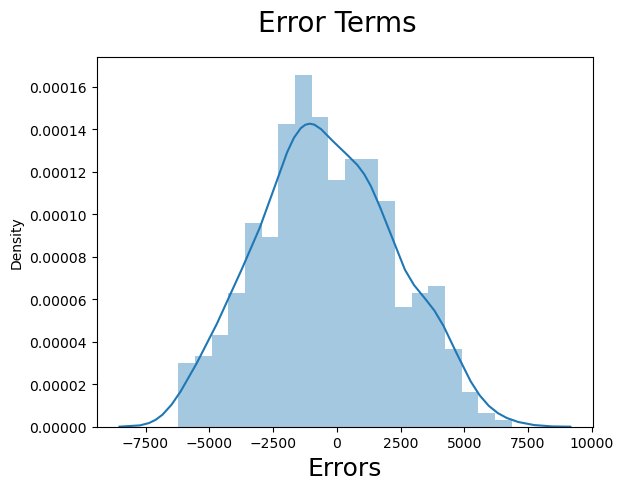

In [114]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

##### It is observed that the residuals follow a normal curve that satisfies the assumption of the model.

#### Making Predictions

In [115]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         146 non-null    float64
 1   yr            146 non-null    float64
 2   temp          146 non-null    float64
 3   hum           146 non-null    float64
 4   windspeed     146 non-null    float64
 5   spring        146 non-null    float64
 6   summer        146 non-null    float64
 7   winter        146 non-null    float64
 8   9             146 non-null    float64
 9   weathersit_2  146 non-null    float64
 10  weathersit_3  146 non-null    float64
dtypes: float64(11)
memory usage: 12.7 KB


In [116]:
y_pred = res2.predict(X_test_sm)

#### Model Evaluation

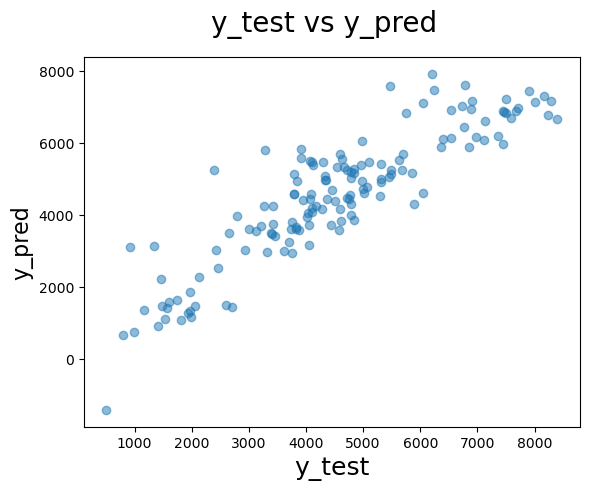

In [117]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [118]:
# Calculating R-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7848584169063395